# MuSCAT 2 mock light curve generation

The `MockLC` class aims to generate realistic MuSCAT2 transit light curves for a given planet, white noise levels, and red noise hyperparameters. The red noise is modelled as a Gaussian process (GP) with an Exponential kernel, and uses `George` for the GP computation.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [110]:
run ../src/mocklc.py

## Basic usage

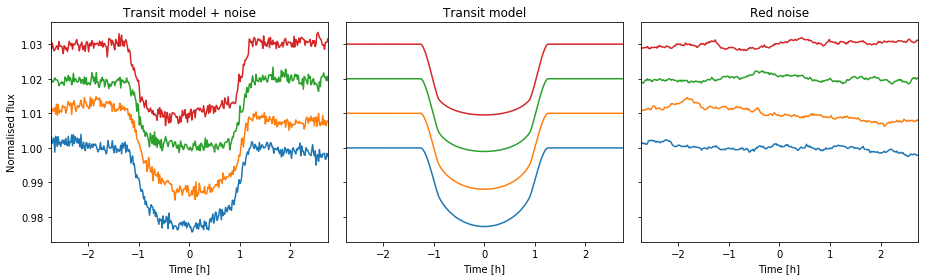

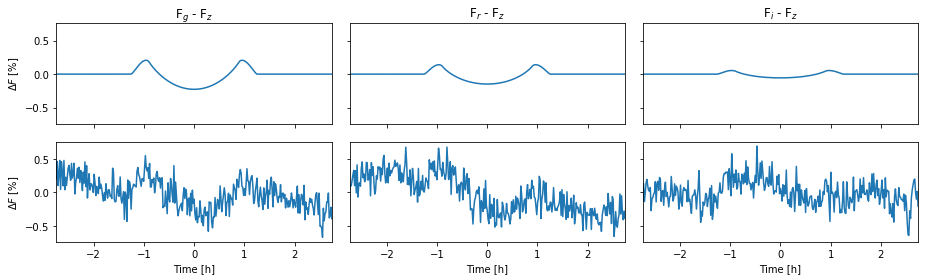

In [118]:
%run ../src/mocklc.py
lc1 = MockLC('CoRoT-1b', bltime=1.5)
lc1.create(wnsigma=[0.001, 0.001, 0.001, 0.001], rnsigma=0.005, rntscale=0.5);
lc1.plot()
lc1.plot_color_difference()

## Contamination

`MockLC` can also create contaminated transit light curves by giving the $i'$-band contamination factor `i_contamination` and the effective temperature of the contaminating star `contaminant_temperature`. Now, the planet-star radius ratio, `MockLC.k`, corresponds to the observed (contaminated) radius ratio in the $i'$-band, and the true radius ratio can be accessed from `MockLC.k0`.

Contamination has two dominant effects on the light curves

1. The target-contaminant colour difference leads to transit depth variations. Depth variations are a clear sign of contamination, but cannot be observed if the target and contaminant have the same temperature.
2. The size of the transiting body has a colour-dependent effect on the ingress & egress shape. This effect can be observed even when the contaminant has the same colour as the target star.

### Colour difference

Contamination is easy to identify if the host and contaminant have clear color (temperature) difference. In this case, the transit depth varies from passband to passband due to varying amount of contamination per passband.

(0.13415939313151606, 0.18973003328633387)

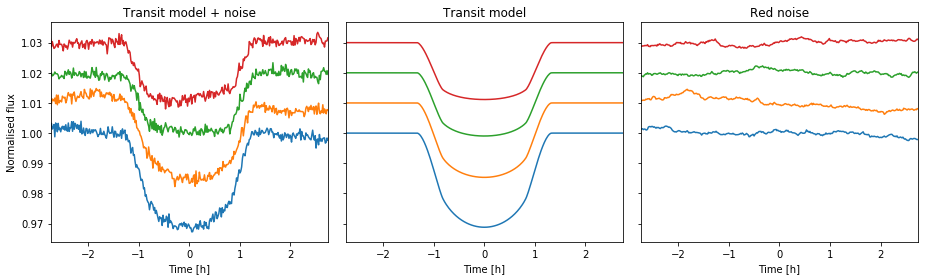

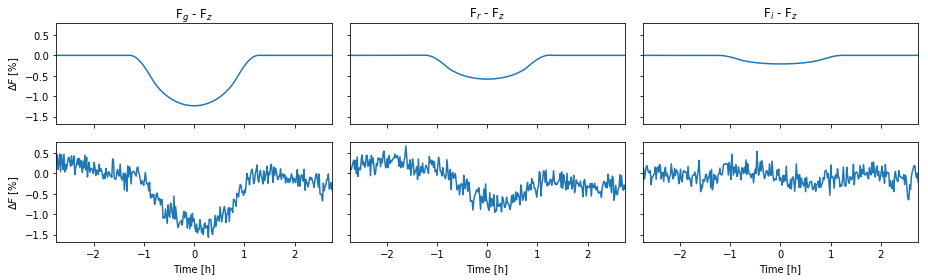

In [120]:
lc2 = MockLC('CoRoT-1b', bltime=1.5, i_contamination=0.5, contaminant_temperature=4400)
lc2.create(wnsigma=[0.001, 0.001, 0.001, 0.001], rnsigma=0.005, rntscale=0.5)
lc2.plot()
lc2.plot_color_difference()
lc2.k, lc2.k0

### No colour difference

The transit depth will not vary if the contaminant has approximately the same effective temperature as the host star (the contamination factor is constant across the passbands). However, the size of the transiting object affects the shape of the ingress and egress, which can be seen as a double-horn signal in the passband flux differences. Sharper horns equal to smaller objects.

array([ 0.49286046,  0.497709  ,  0.5       ,  0.50133919])

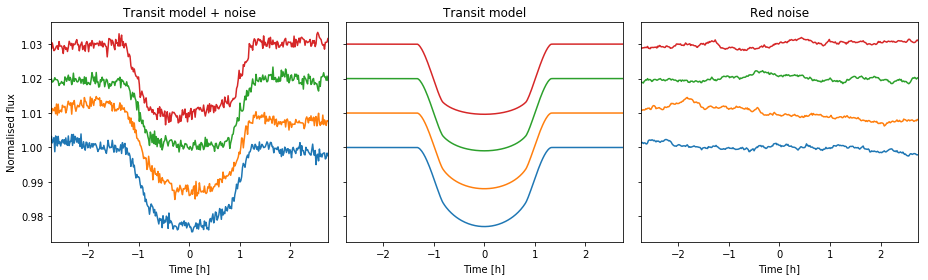

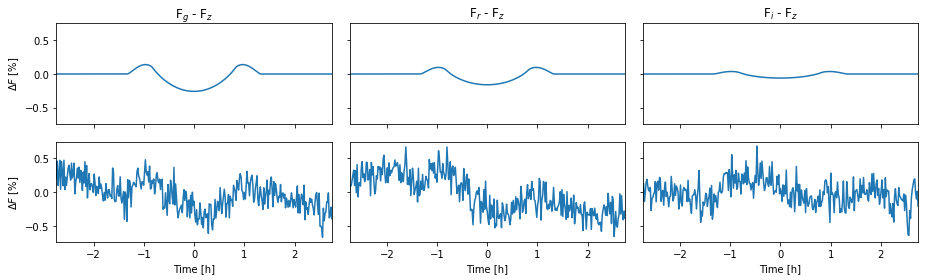

In [121]:
lc2 = MockLC('CoRoT-1b', bltime=1.5, i_contamination=0.5, contaminant_temperature=6200)
lc2.create(wnsigma=[0.001, 0.001, 0.001, 0.001], rnsigma=0.005, rntscale=0.5)
lc2.plot()
lc2.plot_color_difference()
lc2.contamination

---
<center>&copy; 2017 Hannu Parviainen</center>